# Data wrangling for SolarPowerCompany Capstone

In [2]:
#Importing necessary packages
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [3]:
#Loading all data from website: https://opendata.edp.com/explore/?refine.keyword=visible&sort=modified
#Note: export files from: https://opendata.edp.com/explore/dataset/htw-failures-2016/export/
#Full list of dfs in table_names, weathers is weather station data and pvs is the solar celld data. 
table_names = ['faro_meteo_2014','faro_meteo_2015','faro_meteo_2016','sunlab_faro_pv_2014','sunlab-faro-pv-2015','sunlab_faro_pv_2016']
weathers = [w for w in table_names if 'meteo' in w]
pvs = [p for p in table_names if 'faro-pv' in p]

In [170]:
#Setting URLs for dataframe extraction
url1 = 'https://opendata.edp.com/explore/dataset/'
url2 = '/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B'

In [5]:
# Set n to min(year)-1. Will load all PV data. 
n = 2013

for i in pvs:
    url = url1+i+url2
    n += 1
    df = pd.read_csv(url, sep=';')
    name = 'pv_'+str(n)
    globals()[name] = df

In [7]:
# Function sorting by datetime, reset index to datetime, and extracting only optimal angle PV data by dropping vertical and horizontal columns. 
#def optimal_data(pv_df):
#    cols = pv_df.columns.str.contains('|'.join(['Optimal','Datetime']))
#    pv_df = pf_df.loc[:,cols]

In [8]:
pv_tot = [pv_2014,pv_2015,pv_2016]
#for i in pv_tot:
#    cols = i.columns.str.contains('|'.join(['Optimal','Datetime']))
#    i = i.loc[:,cols]
#    i.sort_values('Datetime')

In [59]:
cols = pv_2014.columns.str.contains('|'.join(['Optimal','Datetime']))
pv_2014 = pv_2014.loc[:,cols]
pv_2014.dtypes


Datetime                         object
A_Optimal - Voltage DC [V]      float64
A_Optimal - Current DC [A]      float64
A_Optimal - Power DC [W]        float64
A_Optimal - Temperature [ºC]    float64
B_Optimal - Voltage DC [V]      float64
B_Optimal - Current DC [A]      float64
B_Optimal - Power DC [W]        float64
B_Optimal - Temperature [ºC]    float64
dtype: object

In [60]:
#Sort datetime as datetime object
pv_2014['Datetime'] = pd.to_datetime(pv_2014['Datetime'])

<ipython-input-60-8cdbf66bfea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2014['Datetime'] = pd.to_datetime(pv_2014['Datetime'])


In [61]:
pv_2014.sort_values('Datetime',inplace=True)
pv_2014.set_index('Datetime',inplace=True)
pv_2014.head()

<ipython-input-61-ea8864858563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2014.sort_values('Datetime',inplace=True)


,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
Datetime,,,,,,,,
2014-01-01 07:41:00+00:00,14.6,0.19527,2.850946,9.4,NaN,NaN,NaN,9.7
2014-01-01 07:42:00+00:00,23.1,0.07250,1.674750,9.4,18.30,0.130512,2.388366,9.7
2014-01-01 07:43:00+00:00,23.1,0.07500,1.732500,9.4,22.35,0.052500,1.173375,9.7
2014-01-01 07:44:00+00:00,23.1,0.07750,1.790250,9.5,24.35,0.052500,1.278375,9.7
2014-01-01 07:45:00+00:00,22.2,0.08250,1.831500,9.5,25.25,0.052500,1.325625,9.7


In [62]:
pv_2014.isnull().sum()

A_Optimal - Voltage DC [V]      1819
A_Optimal - Current DC [A]      1819
A_Optimal - Power DC [W]        1819
A_Optimal - Temperature [ºC]       0
B_Optimal - Voltage DC [V]      2503
B_Optimal - Current DC [A]      2503
B_Optimal - Power DC [W]        2503
B_Optimal - Temperature [ºC]       0
dtype: int64

In [63]:
pv_2014.describe()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
count,260326.000000,260326.000000,260326.000000,262145.000000,259642.000000,259642.000000,259642.000000,262145.000000
mean,27.548402,3.577849,100.105835,27.776741,26.475817,3.550063,97.261609,29.508469
std,2.152847,2.633185,72.999151,8.683313,3.415378,2.644173,72.595414,9.505423
min,10.100000,0.000000,0.000000,3.900000,10.200000,0.000000,0.000000,4.100000
25%,26.950000,1.020000,28.665563,20.700000,26.800000,0.995000,24.728500,21.700000
50%,27.850000,3.295000,94.726625,27.900000,27.400000,3.222500,91.200000,29.500000
75%,28.850000,6.107500,170.354438,34.600000,28.100000,6.102500,167.580000,37.100000
max,36.900000,10.237500,307.636875,54.400000,36.550000,10.237500,303.030000,56.900000


In [65]:
#Same process for 2015 and 2016
cols = pv_2015.columns.str.contains('|'.join(['Optimal','Datetime']))
pv_2015 = pv_2015.loc[:,cols]
cols = pv_2016.columns.str.contains('|'.join(['Optimal','Datetime']))
pv_2016 = pv_2016.loc[:,cols]

In [66]:
pv_2015['Datetime'] = pd.to_datetime(pv_2015['Datetime'])
pv_2015.sort_values('Datetime',inplace=True)
pv_2015.set_index('Datetime',inplace=True)
pv_2016['Datetime'] = pd.to_datetime(pv_2016['Datetime'])
pv_2016.sort_values('Datetime',inplace=True)
pv_2016.set_index('Datetime',inplace=True)

<ipython-input-66-104782e95679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2015['Datetime'] = pd.to_datetime(pv_2015['Datetime'])
<ipython-input-66-104782e95679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2015.sort_values('Datetime',inplace=True)
<ipython-input-66-104782e95679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [67]:
pv_2015.head()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
Datetime,,,,,,,,
2015-01-01 07:40:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:41:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:42:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:43:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.2
2015-01-01 07:44:00+00:00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.1


In [68]:
pv_2016.head()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
Datetime,,,,,,,,
2016-01-01 07:43:00+00:00,NaN,NaN,NaN,17.6,NaN,NaN,NaN,18.0
2016-01-01 07:44:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.2
2016-01-01 07:45:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.3
2016-01-01 07:46:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.4
2016-01-01 07:47:00+00:00,NaN,NaN,NaN,17.9,NaN,NaN,NaN,18.4


In [69]:
pv_2015.isnull().sum()

A_Optimal - Voltage DC [V]      4854
A_Optimal - Current DC [A]      4854
A_Optimal - Power DC [W]        4854
A_Optimal - Temperature [ºC]       0
B_Optimal - Voltage DC [V]      3765
B_Optimal - Current DC [A]      3765
B_Optimal - Power DC [W]        3765
B_Optimal - Temperature [ºC]       0
dtype: int64

In [70]:
pv_2016.isnull().sum()

A_Optimal - Voltage DC [V]      3488
A_Optimal - Current DC [A]      3488
A_Optimal - Power DC [W]        3488
A_Optimal - Temperature [ºC]       0
B_Optimal - Voltage DC [V]      2965
B_Optimal - Current DC [A]      2965
B_Optimal - Power DC [W]        2965
B_Optimal - Temperature [ºC]       0
dtype: int64

In [71]:
pv_2015.describe()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
count,237881.000000,237881.000000,237881.000000,242735.000000,238970.000000,238970.000000,238970.000000,242735.000000
mean,27.434931,3.719734,103.750133,28.708070,26.324167,3.707638,101.255219,30.540670
std,2.177097,2.636596,73.016633,8.844692,3.607820,2.665199,73.035523,9.681179
min,10.100000,0.000000,0.000000,2.000000,10.350000,0.000000,0.000000,2.300000
25%,26.950000,1.145000,32.232000,21.700000,26.750000,1.115000,28.196437,22.800000
50%,27.750000,3.547500,101.427500,29.200000,27.350000,3.490000,98.325000,31.000000
75%,28.700000,6.312500,174.998250,35.700000,28.000000,6.345000,173.052000,38.400000
max,34.650000,10.237500,307.636875,54.000000,34.900000,10.237500,302.006250,55.500000


In [72]:
pv_2016.describe()

,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
count,174284.000000,174284.000000,174284.000000,177772.000000,174807.000000,174807.000000,174807.000000,177772.000000
mean,27.670370,3.375201,96.012102,28.924899,26.287085,3.581693,97.548834,30.857634
std,2.909338,2.379406,67.654038,9.198494,3.553645,2.602800,71.077376,10.112498
min,10.100000,0.000000,0.000000,3.900000,10.350000,0.000000,0.000000,3.900000
25%,27.300000,1.030000,28.860000,21.300000,26.650000,1.035000,25.778062,22.300000
50%,28.150000,3.397500,97.565125,28.800000,27.300000,3.370000,94.830750,30.700000
75%,29.350000,5.197500,148.224250,36.600000,27.950000,6.125000,166.676250,39.300000
max,35.300000,10.237500,287.194000,58.600000,35.150000,10.237500,298.423125,62.000000


For ease, we're also going to replace the Optimal in all column labels. We're also going to elimnate rows which are missing both A & B Voltage, Current, and Power data. 

In [73]:
# Cleaning up column names
pv_2014.columns = pv_2014.columns.str.replace('_Optimal - ',' ')
pv_2015.columns = pv_2015.columns.str.replace('_Optimal - ',' ')
pv_2016.columns = pv_2016.columns.str.replace('_Optimal - ',' ')

In [76]:
pv_2016.head()

,A Voltage DC [V],A Current DC [A],A Power DC [W],A Temperature [ºC],B Voltage DC [V],B Current DC [A],B Power DC [W],B Temperature [ºC]
Datetime,,,,,,,,
2016-01-01 07:43:00+00:00,NaN,NaN,NaN,17.6,NaN,NaN,NaN,18.0
2016-01-01 07:44:00+00:00,NaN,NaN,NaN,17.7,NaN,NaN,NaN,18.2
2016-01-01 07:45:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.3
2016-01-01 07:46:00+00:00,NaN,NaN,NaN,17.8,NaN,NaN,NaN,18.4
2016-01-01 07:47:00+00:00,NaN,NaN,NaN,17.9,NaN,NaN,NaN,18.4


In [83]:
# Getting rid of null rows. 
pv_2014.dropna(thresh=5,inplace=True)
pv_2015.dropna(thresh=5,inplace=True)
pv_2016.dropna(thresh=5,inplace=True)

<ipython-input-83-8795d7cbe479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2014.dropna(thresh=5,inplace=True)
<ipython-input-83-8795d7cbe479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2015.dropna(thresh=5,inplace=True)
<ipython-input-83-8795d7cbe479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_2016.dropna(thresh=5,inplace=True)


Now save the dfs as is before any more concats or visualizations.

In [86]:
pv_2014.to_pickle('./pv_2014.pkl')
pv_2015.to_pickle('./pv_2015.pkl')
pv_2016.to_pickle('./pv_2016.pkl')

In [88]:
# Now concat all 3 dfs into one pv df simply called pv_tot.
pv_tot = pd.concat([pv_2014, pv_2015, pv_2016], sort=False)

Now we take a look at the data and see if anything look awry. 

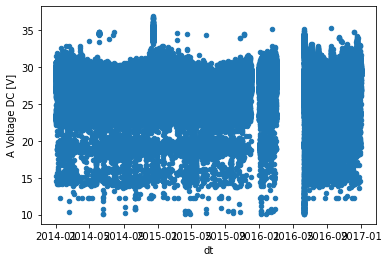

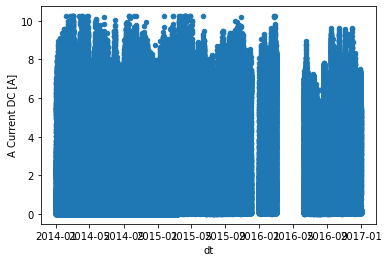

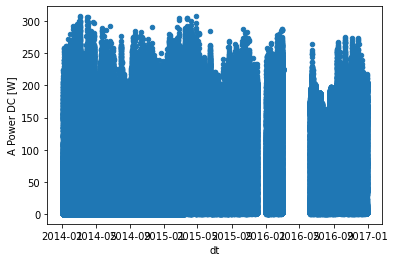

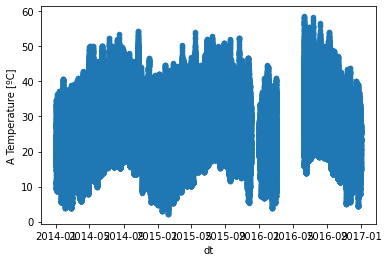

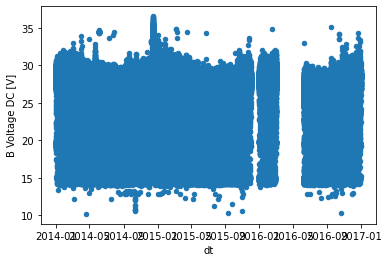

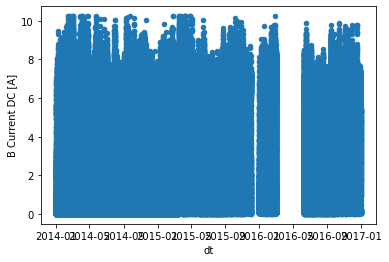

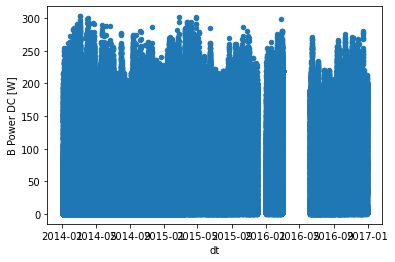

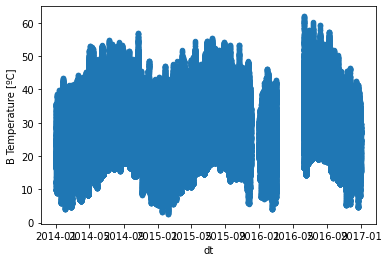

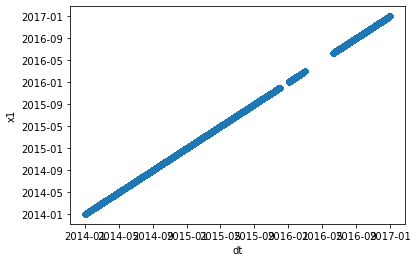

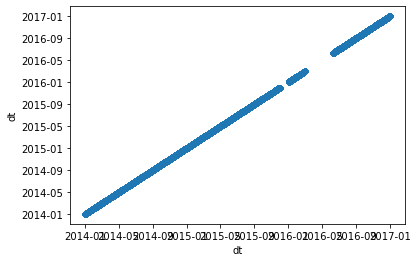

In [95]:
pv_tot['dt']=pv_tot.index
for i in pv_tot.columns:
    pv_tot.plot.scatter(x = 'dt', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1259d5cd0>,
      dtype=object)

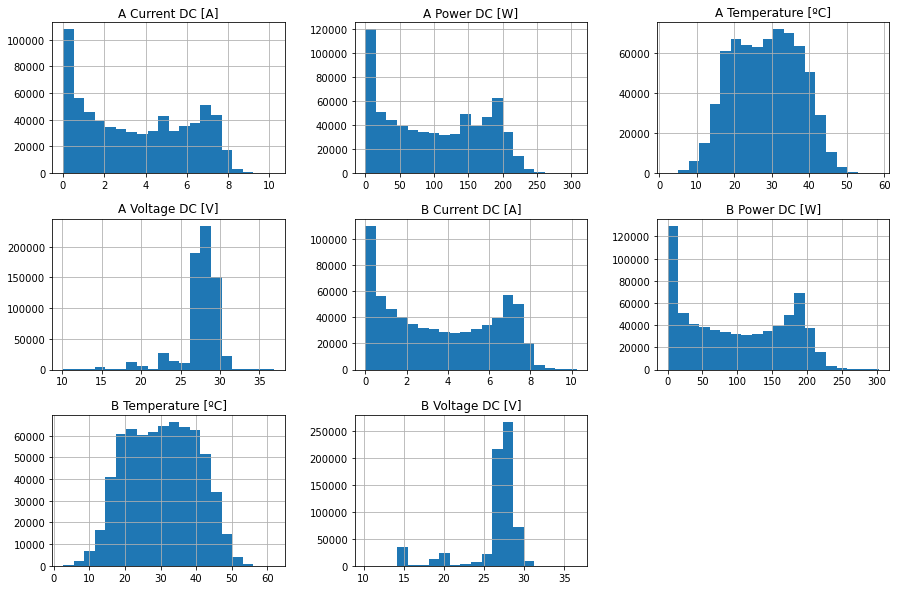

In [96]:
pv_tot.hist(bins=20,figsize=(15,10))

In [123]:
# No drastic A/B differences noted, so we're going to use that as an attribute. 
ts = pv_tot

In [124]:
a_cols = [col for col in ts.columns if 'A ' in col]
b_cols = [col for col in ts.columns if 'B ' in col]
ts_a = ts[a_cols]
ts_b = ts[b_cols]

In [125]:
ts_a['PV Cell'] = 'A'
ts_b['PV Cell'] = 'B'

<ipython-input-125-754e6a424b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_a['PV Cell'] = 'A'
<ipython-input-125-754e6a424b20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_b['PV Cell'] = 'B'


In [126]:
ts_a.columns = ts_a.columns.str.replace('A ','')
ts_b.columns = ts_b.columns.str.replace('B ','')

In [127]:
ts_b.head()

,Voltage DC [V],Current DC [A],Power DC [W],Temperature [ºC],PV Cell
Datetime,,,,,
2014-01-01 07:41:00+00:00,NaN,NaN,NaN,9.7,B
2014-01-01 07:42:00+00:00,18.30,0.130512,2.388366,9.7,B
2014-01-01 07:43:00+00:00,22.35,0.052500,1.173375,9.7,B
2014-01-01 07:44:00+00:00,24.35,0.052500,1.278375,9.7,B
2014-01-01 07:45:00+00:00,25.25,0.052500,1.325625,9.7,B


In [146]:
ts = pd.concat([ts_a,ts_b],sort=True)

In [147]:
ts.isnull().sum()

Current DC [A]      5902
PV Cell                0
Power DC [W]        5902
Temperature [ºC]       0
Voltage DC [V]      5902
dtype: int64

In [148]:
ts.dropna(thresh=3,inplace=True)

In [149]:
ts.isnull().sum()

Current DC [A]      0
PV Cell             0
Power DC [W]        0
Temperature [ºC]    0
Voltage DC [V]      0
dtype: int64

In [151]:
ts.sort_index(inplace=True)

In [152]:
pv_final = ts

Saving final PV df 

In [154]:
pv_final.to_pickle('./pv_final.pkl')

----------------------------

Now moving on to weather data.

In [165]:
#Load data sets. 
# Set n to min(year)-1. Will load all PV data. 
#Note: not sure why I have to manually put in url????
url1 = 'https://opendata.edp.com/explore/dataset/'
url2 = '/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B'

w_2015 = df=pd.read_csv('https://opendata.edp.com/explore/dataset/'+'faro_meteo_2015'+'/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B',sep=';')

In [173]:
w_2016 = pd.read_csv('https://opendata.edp.com/explore/dataset/sunlab-faro-meteo-2016/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B',sep=';')

In [175]:
w_2014 = pd.read_csv('https://opendata.edp.com/explore/dataset/sunlab-faro-meteo-2014/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B',sep=';')

In [176]:
w_2014.dtypes, w_2015.dtypes, w_2016.dtypes

(Datetime                       object
 Ambient Temperature [ºC]      float64
 Global Radiation [W/m2]       float64
 Diffuse Radiation [W/m2]      float64
 Ultraviolet [W/m2]            float64
 Wind Velocity [m/s]           float64
 Wind Direction [º]            float64
 Precipitation [mm]            float64
 Atmospheric pressure [hPa]    float64
 dtype: object,
 Datetime                       object
 Ambient Temperature [ºC]      float64
 Global Radiation [W/m2]       float64
 Diffuse Radiation [W/m2]      float64
 Ultraviolet [W/m2]            float64
 Wind Velocity [m/s]           float64
 Wind Direction [º]            float64
 Precipitation [mm]            float64
 Atmospheric pressure [hPa]    float64
 dtype: object,
 Datetime                       object
 Ambient Temperature [ºC]      float64
 Global Radiation [W/m2]       float64
 Direct Radiation [W/m2]       float64
 Ultraviolet [W/m2]            float64
 Wind Velocity [m/s]           float64
 Wind Direction [º]            f

In [177]:
# Make Datetime a pandas datetime object
w_2014['Datetime'] = pd.to_datetime(w_2014['Datetime'])
w_2015['Datetime'] = pd.to_datetime(w_2015['Datetime'])
w_2016['Datetime'] = pd.to_datetime(w_2016['Datetime'])

In [180]:
w_2014.sort_values('Datetime',inplace=True)
w_2014.set_index('Datetime',inplace=True)
w_2014.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Precipitation [mm],Atmospheric pressure [hPa]
Datetime,,,,,,,,
2014-01-01T00:00:00+00:00,15.300000,1.406050,1.649239,0.508442,2.300000,232.00156,NaN,NaN
2014-01-01T00:01:00+00:00,15.300000,1.365813,1.645474,0.507736,2.416667,227.50672,NaN,NaN
2014-01-01T00:02:00+00:00,15.283334,1.406155,1.649413,0.508740,2.500000,219.86790,NaN,NaN
2014-01-01T00:03:00+00:00,15.300000,1.293696,1.645420,0.508438,2.850000,222.98490,NaN,NaN
2014-01-01T00:04:00+00:00,15.300000,1.474050,1.645991,0.508635,2.500000,228.94006,NaN,NaN


In [181]:
w_2015.sort_values('Datetime',inplace=True)
w_2015.set_index('Datetime',inplace=True)
w_2015.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Precipitation [mm],Atmospheric pressure [hPa]
Datetime,,,,,,,,
2015-01-01T00:00:00+00:00,10.400002,1.098596,1.618006,0.505952,0.516667,255.22150,NaN,NaN
2015-01-01T00:01:00+00:00,10.400002,1.120178,1.613055,0.506539,0.566667,249.66712,NaN,NaN
2015-01-01T00:02:00+00:00,10.400002,1.104296,1.623519,0.507859,0.650000,255.66654,NaN,NaN
2015-01-01T00:03:00+00:00,10.466666,1.295270,1.624031,0.507556,0.766667,261.00036,NaN,NaN
2015-01-01T00:04:00+00:00,10.500000,1.332270,1.631340,0.508762,0.750000,259.16668,NaN,NaN


In [182]:
w_2016.sort_values('Datetime',inplace=True)
w_2016.set_index('Datetime',inplace=True)
w_2016.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Precipitation [mm],Atmospheric pressure [hPa]
Datetime,,,,,,,,
2016-01-01T00:00:00+00:00,14.700000,1.310691,1.652583,0.512630,0.366667,236.00228,NaN,NaN
2016-01-01T00:01:00+00:00,14.700000,1.329118,1.649963,0.512932,0.366667,249.30390,NaN,NaN
2016-01-01T00:02:00+00:00,14.700000,1.696856,1.647226,0.512932,0.416667,272.17626,NaN,NaN
2016-01-01T00:03:00+00:00,14.633332,1.717860,1.658082,0.512529,0.483333,298.29700,NaN,NaN
2016-01-01T00:04:00+00:00,14.600000,1.721190,1.660759,0.512331,0.516667,323.33370,NaN,NaN


Precipitation and ATM data are missing. May look into if we can get them, but we'll see. 

In [184]:
w_2014.drop(['Precipitation [mm]','Atmospheric pressure [hPa]'], axis=1,inplace=True)
w_2015.drop(['Precipitation [mm]','Atmospheric pressure [hPa]'], axis=1,inplace=True)
w_2016.drop(['Precipitation [mm]','Atmospheric pressure [hPa]'], axis=1,inplace=True)

In [210]:
w_2016.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Direct Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
Datetime,,,,,,
2016-01-01T00:00:00+00:00,14.700000,1.310691,1.652583,0.512630,0.366667,236.00228
2016-01-01T00:01:00+00:00,14.700000,1.329118,1.649963,0.512932,0.366667,249.30390
2016-01-01T00:02:00+00:00,14.700000,1.696856,1.647226,0.512932,0.416667,272.17626
2016-01-01T00:03:00+00:00,14.633332,1.717860,1.658082,0.512529,0.483333,298.29700
2016-01-01T00:04:00+00:00,14.600000,1.721190,1.660759,0.512331,0.516667,323.33370


In [223]:
w_2014.columns, w_2015.columns, w_2016.columns

(Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
        'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
        'Wind Direction [º]'],
       dtype='object'),
 Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
        'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
        'Wind Direction [º]'],
       dtype='object'),
 Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
        'Direct Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
        'Wind Direction [º]'],
       dtype='object'))

2016 had direct radiation listed instead of diffuse radiation. Checking data summary.

In [224]:
w_2014.describe(), w_2015.describe(), w_2016.describe()

(       Ambient Temperature [ºC]  Global Radiation [W/m2]  \
 count              5.248630e+05            524863.000000   
 mean              -1.141335e+04               223.294353   
 std                4.140922e+06               313.720689   
 min               -1.500000e+09                 0.730029   
 25%                1.430000e+01                 1.562114   
 50%                1.811667e+01                 7.665313   
 75%                2.210000e+01               410.771820   
 max                3.540000e+01              1438.887200   
 
        Diffuse Radiation [W/m2]  Ultraviolet [W/m2]  Wind Velocity [m/s]  \
 count             524863.000000       524863.000000         5.248630e+05   
 mean                  63.215598           13.911304        -1.142947e+04   
 std                   94.256803           19.163539         4.140922e+06   
 min                    1.583013            0.496529        -1.500000e+09   
 25%                    1.684195            0.510643         1.0

Diffuse radiation should be significantly less than direct radiation (barring a crazy high jump in Fero, Portugal's yearly radiation) as it is the radiation the atmosphere scatters. Let's plot the 3 years radiation measurement to see if 2016 is much higher than the others (statistical data says no). 

In [237]:
w_2014['dt'] = w_2014.index
w_2014['dt'] = pd.to_datetime(w_2014['dt'])
w_2015['dt'] = w_2015.index
w_2015['dt'] = pd.to_datetime(w_2015['dt'])
w_2016['dt'] = w_2016.index
w_2016['dt'] = pd.to_datetime(w_2016['dt'])

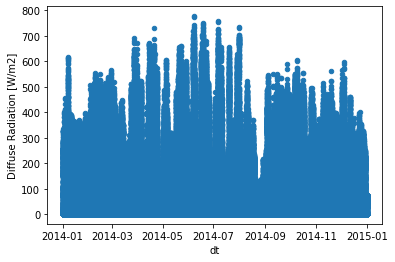

In [236]:
w_2014.plot.scatter(x='dt',y='Diffuse Radiation [W/m2]')

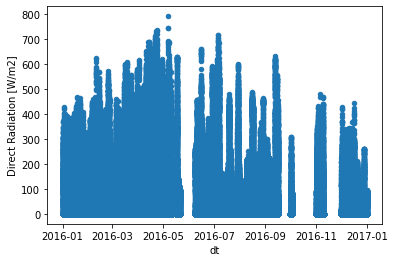

In [238]:
w_2016.plot.scatter(x='dt',y='Direct Radiation [W/m2]')

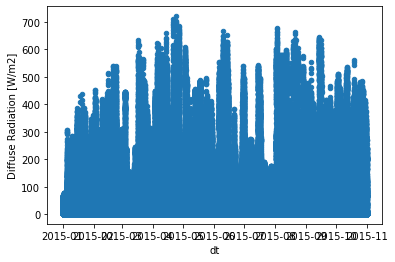

In [240]:
w_2015.plot.scatter(x='dt',y='Diffuse Radiation [W/m2]')

Given the plots, the most likley scenario is 2016 is mislabeled. Renaming it for consistency and then going to concatenate the 3 dfs. 

In [244]:
w_2016.rename(columns={'Direct Radiation [W/m2]': 'Diffuse Radiation [W/m2]'},inplace=True)

In [245]:
w_2016.columns

Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
       'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
       'Wind Direction [º]', 'dt'],
      dtype='object')

In [249]:
#Saving dfs as is before concatonation
w_2014.to_pickle('./w_2014.pkl')
w_2015.to_pickle('./w_2015.pkl')
w_2016.to_pickle('./w_2016.pkl')

In [250]:
w_tot = pd.concat([w_2014,w_2015,w_2016])

In [252]:
w_tot.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt
Datetime,,,,,,,
2014-01-01T00:00:00+00:00,15.300000,1.406050,1.649239,0.508442,2.300000,232.00156,2014-01-01 00:00:00+00:00
2014-01-01T00:01:00+00:00,15.300000,1.365813,1.645474,0.507736,2.416667,227.50672,2014-01-01 00:01:00+00:00
2014-01-01T00:02:00+00:00,15.283334,1.406155,1.649413,0.508740,2.500000,219.86790,2014-01-01 00:02:00+00:00
2014-01-01T00:03:00+00:00,15.300000,1.293696,1.645420,0.508438,2.850000,222.98490,2014-01-01 00:03:00+00:00
2014-01-01T00:04:00+00:00,15.300000,1.474050,1.645991,0.508635,2.500000,228.94006,2014-01-01 00:04:00+00:00


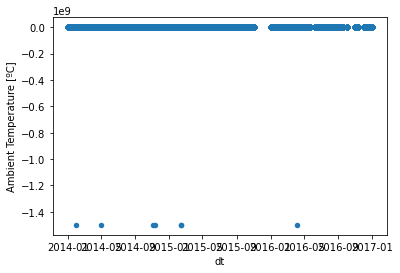

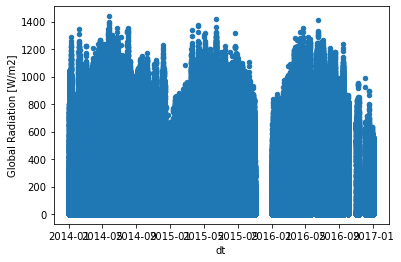

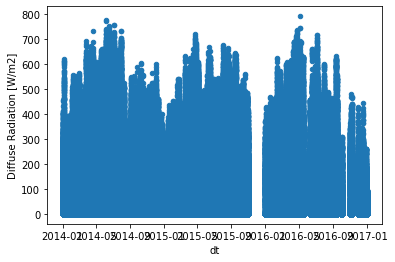

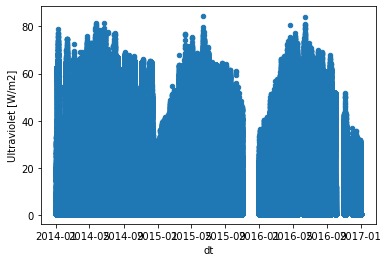

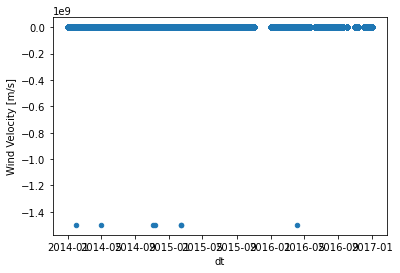

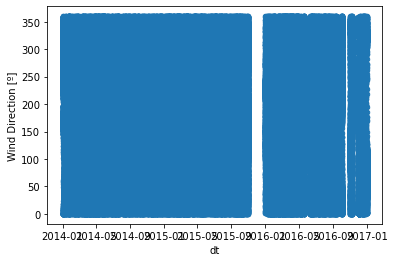

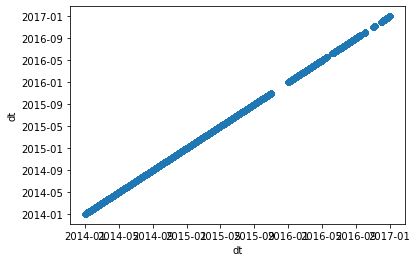

In [253]:
for i in w_tot.columns:
    w_tot.plot.scatter(x='dt', y = i)

In [254]:
w_tot['Wind Velocity [m/s]'].min(), w_tot['Ambient Temperature [ºC]'].min()

(-1500000000.0, -1500000000.0)

In [255]:
#removing outlier rows on wind velocity and temperature
w_tot.loc[w_tot['Ambient Temperature [ºC]'] == -1.500000e+09]
w_tot.loc[w_tot['Wind Velocity [m/s]'] == -1.500000e+09]
w_tot = w_tot.loc[w_tot['Wind Velocity [m/s]'] != -1.500000e+09]

In [256]:
w_tot.loc[w_tot['Wind Velocity [m/s]'] == -1.500000e+09]

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt
Datetime,,,,,,,


In [257]:
w_tot.loc[w_tot['Ambient Temperature [ºC]'] == -1.500000e+09]

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt
Datetime,,,,,,,


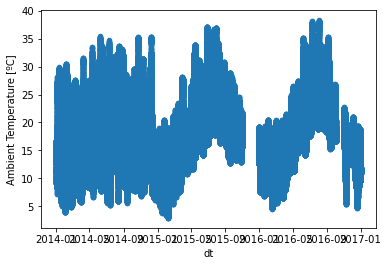

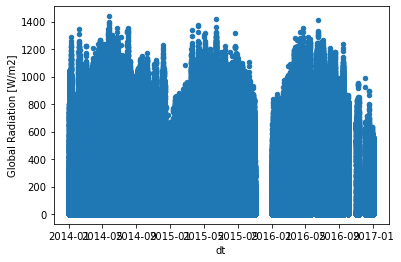

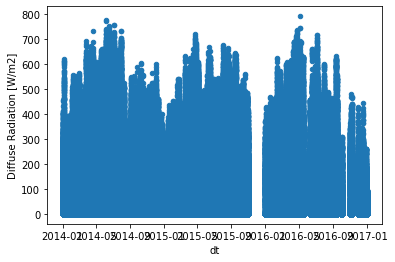

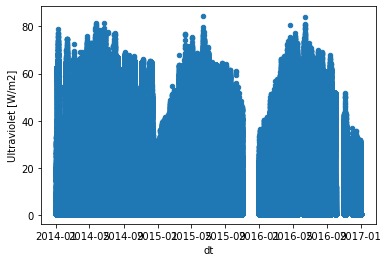

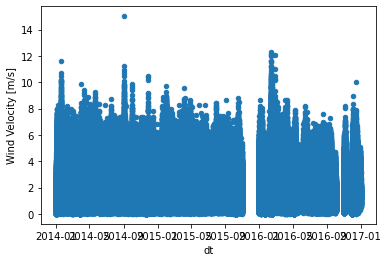

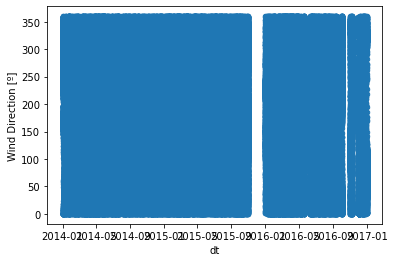

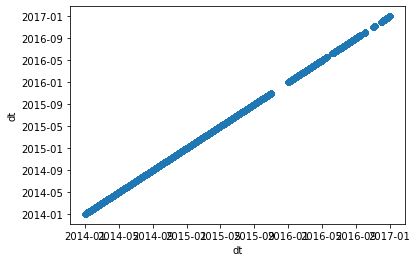

In [258]:
for i in w_tot.columns:
    w_tot.plot.scatter(x='dt', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bc97d90>,
      dtype=object)

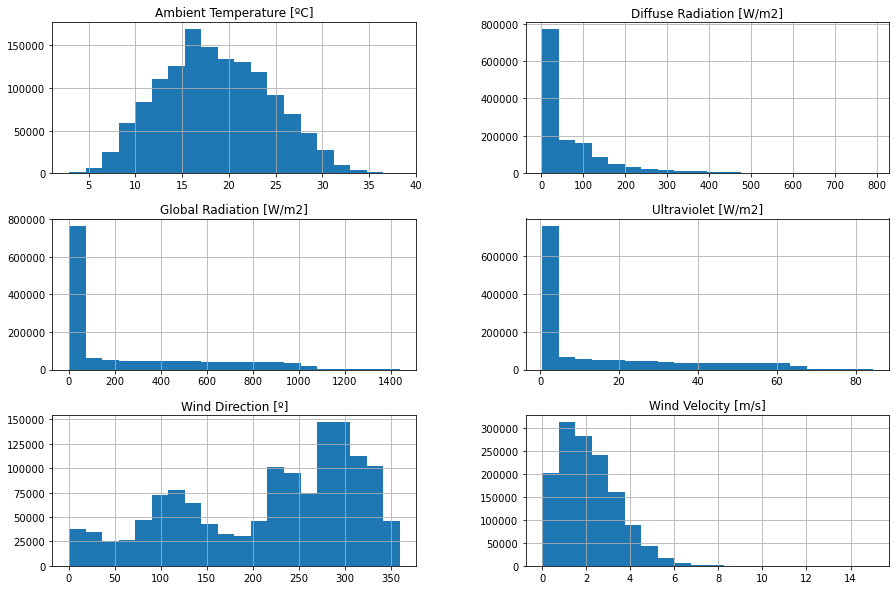

In [260]:
w_tot.hist(bins=20,figsize=(15,10))

In [2]:
#Save data frame with note that the missing chunk of time in 2016 may need addressed
w_tot.to_pickle('./w_tot.pkl')

NameError: name 'w_tot' is not defined

Reload our pickle files (w_tot and pv_final)

In [3]:
w_df = pd.read_pickle('./w_tot.pkl')

In [4]:
pv_df = pd.read_pickle('./pv_final.pkl')

In [7]:
w_df.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt
Datetime,,,,,,,
2014-01-01T00:00:00+00:00,15.300000,1.406050,1.649239,0.508442,2.300000,232.00156,2014-01-01 00:00:00+00:00
2014-01-01T00:01:00+00:00,15.300000,1.365813,1.645474,0.507736,2.416667,227.50672,2014-01-01 00:01:00+00:00
2014-01-01T00:02:00+00:00,15.283334,1.406155,1.649413,0.508740,2.500000,219.86790,2014-01-01 00:02:00+00:00
2014-01-01T00:03:00+00:00,15.300000,1.293696,1.645420,0.508438,2.850000,222.98490,2014-01-01 00:03:00+00:00
2014-01-01T00:04:00+00:00,15.300000,1.474050,1.645991,0.508635,2.500000,228.94006,2014-01-01 00:04:00+00:00


In [10]:
pv_df['dt'] = pv_df.index
pv_df['dt'] = pd.to_datetime(pv_df['dt'])

In [11]:
pv_df.head()

,Current DC [A],PV Cell,Power DC [W],Temperature [ºC],Voltage DC [V],dt
Datetime,,,,,,
2014-01-01 07:41:00+00:00,0.195270,A,2.850946,9.4,14.60,2014-01-01 07:41:00+00:00
2014-01-01 07:42:00+00:00,0.130512,B,2.388366,9.7,18.30,2014-01-01 07:42:00+00:00
2014-01-01 07:42:00+00:00,0.072500,A,1.674750,9.4,23.10,2014-01-01 07:42:00+00:00
2014-01-01 07:43:00+00:00,0.075000,A,1.732500,9.4,23.10,2014-01-01 07:43:00+00:00
2014-01-01 07:43:00+00:00,0.052500,B,1.173375,9.7,22.35,2014-01-01 07:43:00+00:00


In [13]:
w_df.index = pd.to_datetime(w_df.index)

In [14]:
w_df.index.dtype

datetime64[ns, UTC]

In [15]:
w_df.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt
Datetime,,,,,,,
2014-01-01 00:00:00+00:00,15.300000,1.406050,1.649239,0.508442,2.300000,232.00156,2014-01-01 00:00:00+00:00
2014-01-01 00:01:00+00:00,15.300000,1.365813,1.645474,0.507736,2.416667,227.50672,2014-01-01 00:01:00+00:00
2014-01-01 00:02:00+00:00,15.283334,1.406155,1.649413,0.508740,2.500000,219.86790,2014-01-01 00:02:00+00:00
2014-01-01 00:03:00+00:00,15.300000,1.293696,1.645420,0.508438,2.850000,222.98490,2014-01-01 00:03:00+00:00
2014-01-01 00:04:00+00:00,15.300000,1.474050,1.645991,0.508635,2.500000,228.94006,2014-01-01 00:04:00+00:00


Both df's index are consistent. Now we attempt to join. PV data is less so we're going to join on that df's index. 

In [16]:
df_tots = pd.merge(w_df,pv_df,how='inner', left_index=True,right_index=True)

In [18]:
df_tots.tail()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt_x,Current DC [A],PV Cell,Power DC [W],Temperature [ºC],Voltage DC [V],dt_y
Datetime,,,,,,,,,,,,,
2016-12-29 17:25:00+00:00,15.300000,7.471079,6.994584,0.913300,1.150000,94.489216,2016-12-29 17:25:00+00:00,0.0375,A,0.97875,14.7,26.1,2016-12-29 17:25:00+00:00
2016-12-29 17:25:00+00:00,15.300000,7.471079,6.994584,0.913300,1.150000,94.489216,2016-12-29 17:25:00+00:00,0.0275,B,0.66550,15.4,24.2,2016-12-29 17:25:00+00:00
2016-12-29 17:26:00+00:00,15.283334,7.122303,6.572085,0.868734,0.933333,82.362288,2016-12-29 17:26:00+00:00,0.0325,B,0.73125,15.3,22.5,2016-12-29 17:26:00+00:00
2016-12-29 17:26:00+00:00,15.283334,7.122303,6.572085,0.868734,0.933333,82.362288,2016-12-29 17:26:00+00:00,0.0375,A,0.93750,14.7,25.0,2016-12-29 17:26:00+00:00
2016-12-29 17:27:00+00:00,15.200000,6.546354,6.150540,0.836866,0.683333,90.670424,2016-12-29 17:27:00+00:00,0.0375,A,0.85500,14.6,22.8,2016-12-29 17:27:00+00:00


In [19]:
df_tots.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Temperature [ºC],Voltage DC [V]
count,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06
mean,2.087393e+01,4.510952e+02,1.237005e+02,2.740742e+01,2.597943e+00,1.998093e+02,3.573051e+00,9.891582e+01,2.945720e+01,2.693634e+01
std,5.567262e+00,3.170598e+02,9.977101e+01,1.944455e+01,1.314048e+00,8.664973e+01,2.608150e+00,7.205573e+01,9.387964e+00,3.075815e+00
min,3.400000e+00,8.764930e-01,1.591053e+00,5.006730e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,1.010000e+01
25%,1.651667e+01,1.581803e+02,5.889961e+01,1.002260e+01,1.633333e+00,1.256611e+02,1.035000e+00,2.740500e+01,2.180000e+01,2.685000e+01
50%,2.090000e+01,4.233756e+02,9.572428e+01,2.441854e+01,2.516667e+00,2.196927e+02,3.335000e+00,9.490838e+01,2.960000e+01,2.755000e+01
75%,2.500000e+01,7.227458e+02,1.557552e+02,4.336762e+01,3.433334e+00,2.678315e+02,6.045000e+00,1.674450e+02,3.690000e+01,2.840000e+01
max,3.830000e+01,1.438887e+03,7.765521e+02,8.426602e+01,1.228333e+01,3.599992e+02,1.023750e+01,3.076369e+02,6.200000e+01,3.690000e+01


In [20]:
df_tots.isnull().sum()

Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dt_x                        0
Current DC [A]              0
PV Cell                     0
Power DC [W]                0
Temperature [ºC]            0
Voltage DC [V]              0
dt_y                        0
dtype: int64

In [22]:
df_tots[df_tots['dt_x'] != df_tots['dt_y']]

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],dt_x,Current DC [A],PV Cell,Power DC [W],Temperature [ºC],Voltage DC [V],dt_y
Datetime,,,,,,,,,,,,,


In [26]:
# No rows where dt_x != dt_y so we'll drop dt columns fully. 
df_tots.drop(['dt_x','dt_y'], axis=1,inplace=True)

In [27]:
df_tots.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],PV Cell,Power DC [W],Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:41:00+00:00,9.7,7.131149,6.929149,0.751824,0.700000,275.33384,0.195270,A,2.850946,9.4,14.60
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.130512,B,2.388366,9.7,18.30
2014-01-01 07:42:00+00:00,9.7,7.040442,6.847878,0.781930,0.666667,278.50306,0.072500,A,1.674750,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.075000,A,1.732500,9.4,23.10
2014-01-01 07:43:00+00:00,9.7,6.594407,6.672844,0.813929,0.616667,284.66712,0.052500,B,1.173375,9.7,22.35


In [30]:
df_tots.rename(columns={'Temperature [ºC]':'Surface Temperature [ºC]'},inplace=True)

In [31]:
df_tots.columns

Index(['Ambient Temperature [ºC]', 'Global Radiation [W/m2]',
       'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Wind Velocity [m/s]',
       'Wind Direction [º]', 'Current DC [A]', 'PV Cell', 'Power DC [W]',
       'Surface Temperature [ºC]', 'Voltage DC [V]'],
      dtype='object')

Saving df_tots as pickle to and we're done. I'll plot some stuff just for fun after. 

In [32]:
df_tots.to_pickle('./df_tots.pkl')

Itentionally left blank to mark the end of data cleaning. Whoohoo!!

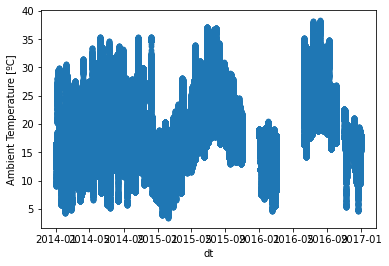

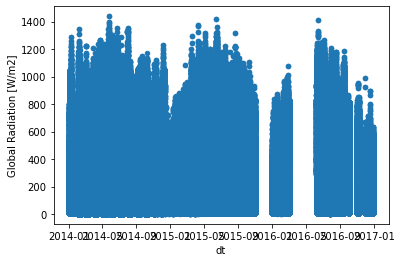

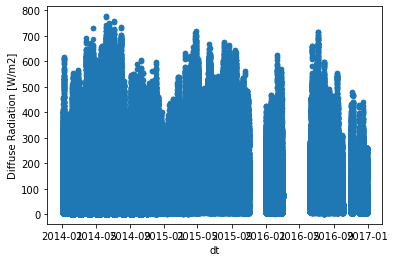

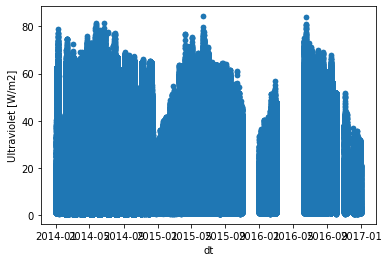

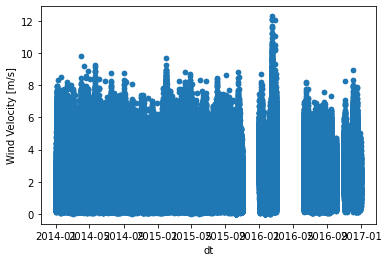

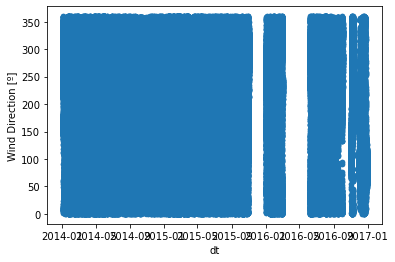

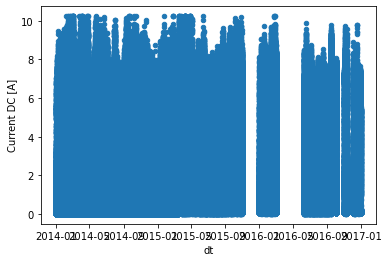

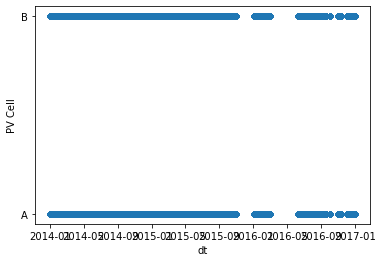

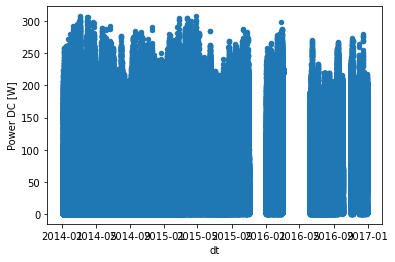

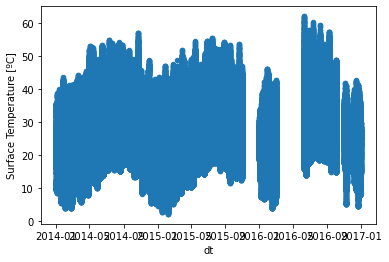

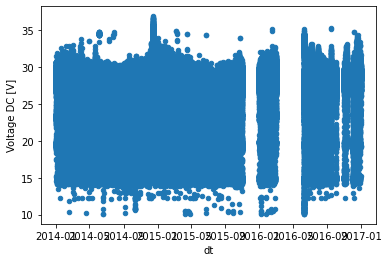

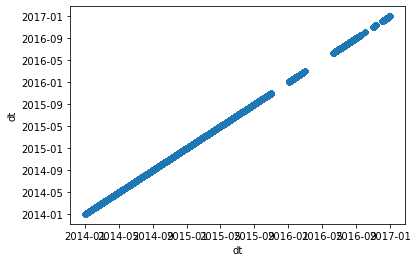

In [36]:
df_tots['dt'] = df_tots.index
for i in df_tots.columns:
    df_tots.plot.scatter(x='dt', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e320f70>,
      dtype=object)

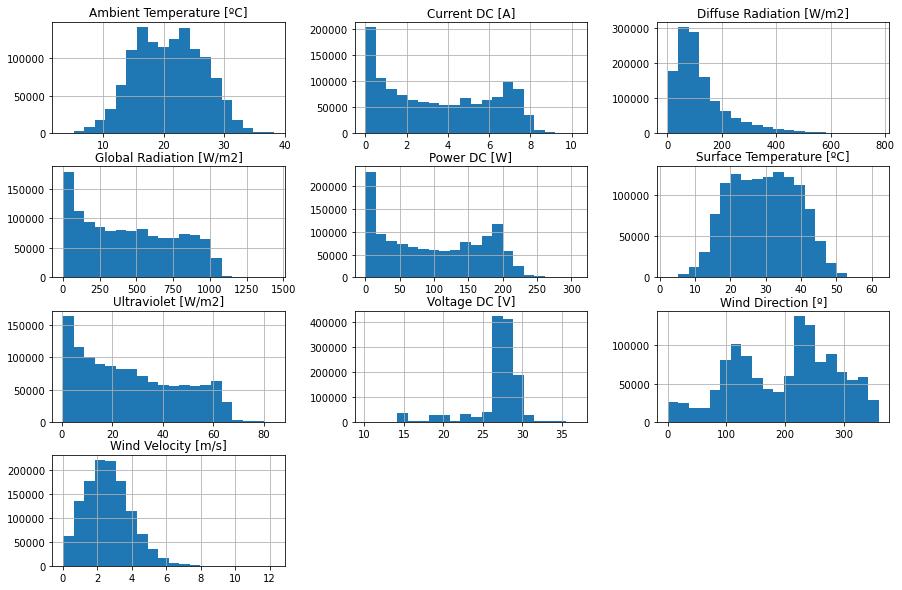

In [37]:
df_tots.hist(bins=20,figsize=(15,10))

One final look at the full dataframe. 

In [5]:
df_read = pd.read_pickle('./pkl_files/df_tots.pkl')

In [6]:
df_read.head(20)

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],PV Cell,Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:41:00+00:00,9.700000,7.131149,6.929149,0.751824,0.700000,275.33384,0.195270,A,2.850946,9.4,14.60
2014-01-01 07:42:00+00:00,9.700000,7.040442,6.847878,0.781930,0.666667,278.50306,0.130512,B,2.388366,9.7,18.30
2014-01-01 07:42:00+00:00,9.700000,7.040442,6.847878,0.781930,0.666667,278.50306,0.072500,A,1.674750,9.4,23.10
2014-01-01 07:43:00+00:00,9.700000,6.594407,6.672844,0.813929,0.616667,284.66712,0.075000,A,1.732500,9.4,23.10
2014-01-01 07:43:00+00:00,9.700000,6.594407,6.672844,0.813929,0.616667,284.66712,0.052500,B,1.173375,9.7,22.35
2014-01-01 07:44:00+00:00,9.700000,7.358729,6.752742,0.849919,0.666667,278.66666,0.077500,A,1.790250,9.5,23.10
2014-01-01 07:44:00+00:00,9.700000,7.358729,6.752742,0.849919,0.666667,278.66666,0.052500,B,1.278375,9.7,24.35
2014-01-01 07:45:00+00:00,9.700000,7.470711,7.181158,0.886891,0.633333,272.66636,0.082500,A,1.831500,9.5,22.20
2014-01-01 07:45:00+00:00,9.700000,7.470711,7.181158,0.886891,0.633333,272.66636,0.052500,B,1.325625,9.7,25.25
